<a href="https://colab.research.google.com/github/thefr33radical/hybrid_forecasting/blob/master/code/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baseline Forecast : Persistence Model Forecast

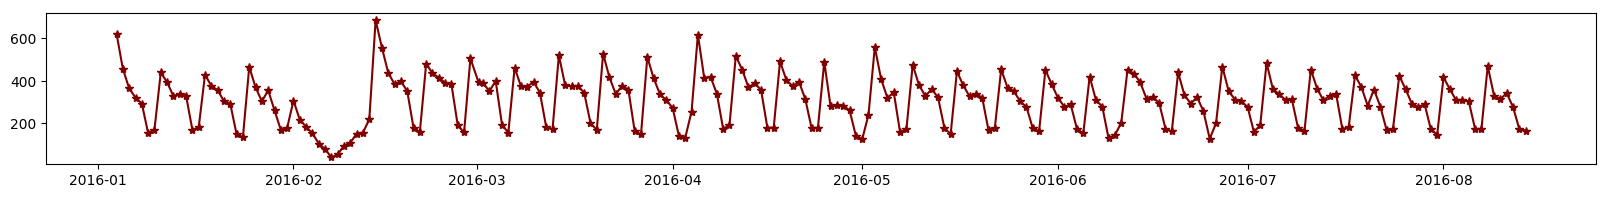

In [16]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import requests
import io
from sklearn.metrics import mean_squared_error as rms
import numpy as np
import math 

data = pd.read_csv("https://raw.githubusercontent.com/thefr33radical/hybrid_forecasting/master/data/parsed_inpatients.csv", error_bad_lines=False,header=0, parse_dates=[1], index_col=0, squeeze=True)
data["num"] = data["num"].astype(float)

t=pd.Series(data["num"])
t.index=data["date"]
data=t

plt.figure(num=None, figsize=(20, 2), dpi=100,facecolor='w', edgecolor='k')
plt.plot(data,marker='*', color='maroon')
plt.show()

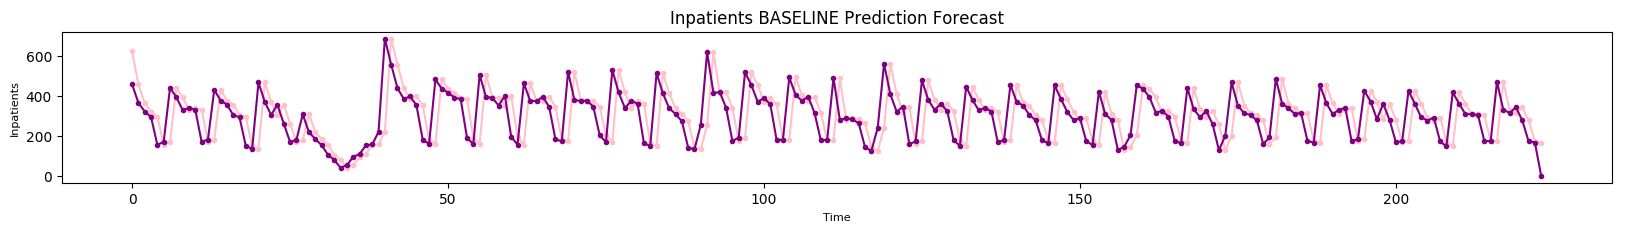

RMSE VALUE :  134.65221405532105


In [22]:
pred_values=[]

for i in range(1,len(data)):
  pred_values.append(data[i])
  
pred_values.append(0)

actual_values = data.values
plt.figure(num=None, figsize=(20, 2), dpi=100,facecolor='w', edgecolor='k')
plt.xlabel('Time', fontsize=8)
plt.ylabel('Inpatients', fontsize=8)
plt.plot(actual_values,marker='.', color='pink')
plt.plot(pred_values,marker='.', color='purple')
plt.title("Inpatients BASELINE Prediction Forecast",fontsize=12)
plt.show()

print("RMSE VALUE : ",math.sqrt(rms(actual_values,pred_values)))

####Links
* https://machinelearningmastery.com/time-series-seasonality-with-python/

# Exponential Smoothing

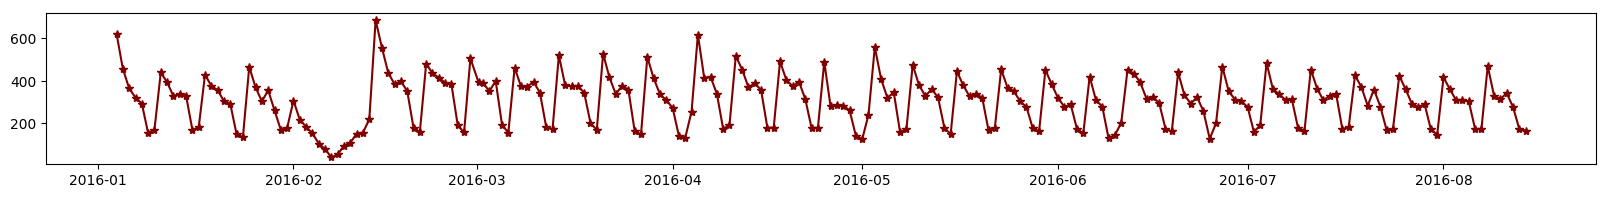

In [43]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import requests
import io
from sklearn.metrics import mean_squared_error as rms
import numpy as np
import math 

data = pd.read_csv("https://raw.githubusercontent.com/thefr33radical/hybrid_forecasting/master/data/parsed_inpatients.csv", error_bad_lines=False,header=0, parse_dates=[1], index_col=0, squeeze=True)
data["num"] = data["num"].astype(float)

plt.figure(num=None, figsize=(20, 2), dpi=100,facecolor='w', edgecolor='k')
plt.plot(data["date"],data["num"],marker='*', color='maroon')
plt.show()

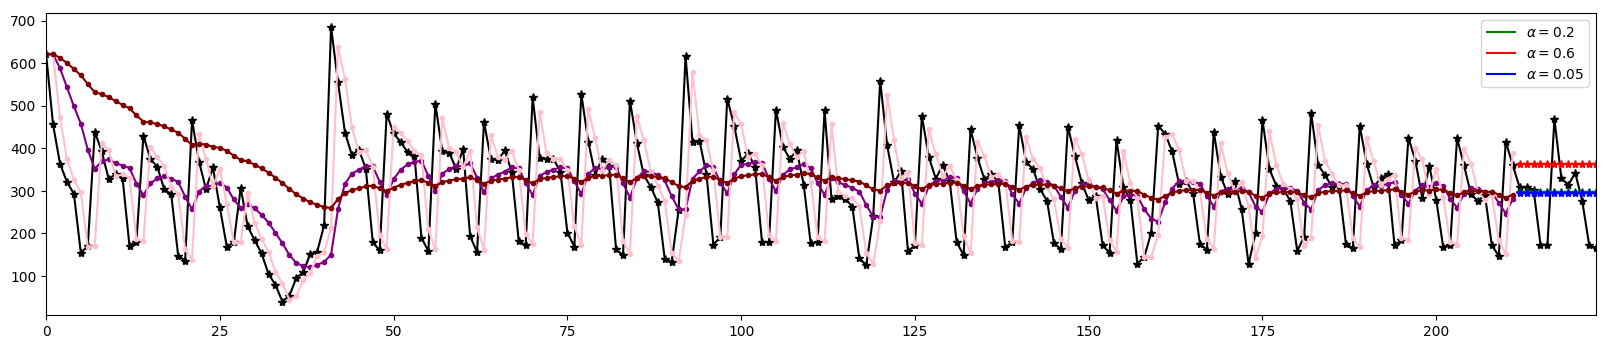

In [44]:
# Plot original Data Points
plt.figure(num=None, figsize=(20, 4), dpi=100,facecolor='w', edgecolor='k')
plt.plot(data["num"],marker='*', color='black')

values = data.iloc[:-12,1]

# Simple Exponential Smoothing ALPHA LEVEL 0.2
fit1 = SimpleExpSmoothing(values).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='*', color='green', legend=True)
fit1.fittedvalues.plot(marker='.',  color='purple')


# Simple Exponential Smoothing ALPHA LEVEL 0.9
fit2 = SimpleExpSmoothing(values).fit(smoothing_level=0.9,optimized=False)
fcast2 = fit2.forecast(12).rename(r'$\alpha=0.6$')
# plot
fcast2.plot(marker='*', color='red', legend=True)
fit2.fittedvalues.plot(marker='.', color='pink')


# Simple Exponential Smoothing ALPHA LEVEL 0.05
fit3 = SimpleExpSmoothing(values).fit(smoothing_level=0.05,optimized=False)
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='*', color='blue', legend=True)
fit3.fittedvalues.plot(marker='.', color='maroon')

plt.show()

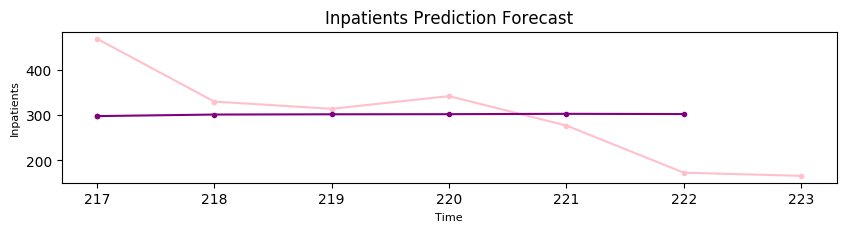

217    297.906793
217    297.906793
218    301.328657
219    301.902084
220    302.144042
221    302.941162
222    302.422338
dtype: float64 7
RMSE VALUE :  98.70536814117702 ALPHA value :  0.02


In [45]:
# Rollling Forecast

# Number of days to Forecast Parameter
end = 7
alpha=0

def exp_smoothing(end,alpha,pred_values):
  pred_values=[]
  values = data.iloc[:-end,1]
  actual_values = data.iloc[len(data)-end:,1]
  indexes=[]

  for i in range(end):
    fit = SimpleExpSmoothing(values).fit(smoothing_level=alpha,optimized=False)
    fnext = fit.forecast(1)  
    indexes.append(fnext.index.values[0])
    pred_values.append(fnext.values[0])
    values = data.iloc[:-end+i,1]

  pred_values=pd.Series(pred_values)
  pred_values.index=indexes
  return pred_values,actual_values

pred_values=[]
min_pred_values=[]
rmse_values=[]
present_min =999999
min_alpha=0

for i in range (0,100,1):
  alpha =  float(i/100)
  pred_values,actual_values=exp_smoothing(end,alpha,pred_values)
  temp=math.sqrt(rms(actual_values,pred_values))
  
  if temp < present_min:
    min_pred_values=pred_values
    min_alpha = alpha
    present_min=temp    

plt.figure(num=None, figsize=(10, 2), dpi=100,facecolor='w', edgecolor='k')
plt.xlabel('Time', fontsize=8)
plt.ylabel('Inpatients', fontsize=8)
plt.plot(actual_values,marker='.', color='pink')
plt.plot(min_pred_values,marker='.', color='purple')
plt.title("Inpatients Prediction Forecast",fontsize=12)
plt.show()
print((min_pred_values),len(actual_values))
# Needs correction ??
print("RMSE VALUE : ",math.sqrt(rms(actual_values,min_pred_values)),"ALPHA value : ",min_alpha)
#print(actual_values,pred_values)

## Exponential Smoothing Resources
* https://github.com/thefr33radical/hybrid_forecasting/blob/master/data/parsed_inpatients.csv
* https://medium.com/datadriveninvestor/how-to-build-exponential-smoothing-models-using-python-simple-exponential-smoothing-holt-and-da371189e1a1
* https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788

# ARIMA 

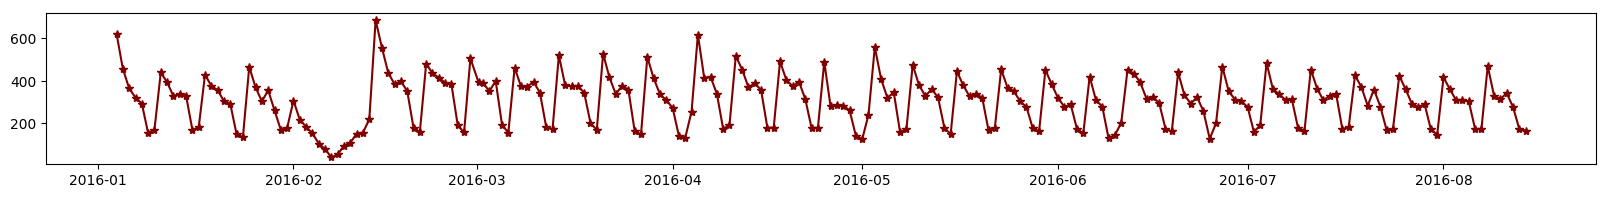

In [48]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt, SARIMAX
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import requests
import io
from sklearn.metrics import mean_squared_error as rms
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/thefr33radical/hybrid_forecasting/master/data/parsed_inpatients.csv", error_bad_lines=False,header=0, parse_dates=[1], index_col=0, squeeze=True)
data["num"] = data["num"].astype(float)

plt.figure(num=None, figsize=(20, 2), dpi=100,facecolor='w', edgecolor='k')
plt.plot(data["date"],data["num"],marker='*', color='maroon')
plt.show()

In [49]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA((data["num"]),(2, 0, 1))
arima_fit= model.fit()
print(arima_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                    num   No. Observations:                  224
Model:                     ARMA(2, 1)   Log Likelihood               -1364.010
Method:                       css-mle   S.D. of innovations            106.662
Date:                Tue, 30 Jul 2019   AIC                           2738.020
Time:                        07:37:07   BIC                           2755.078
Sample:                             0   HQIC                          2744.905
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        303.5013      9.411     32.248      0.000     285.055     321.947
ar.L1.num      0.0983      0.185      0.531      0.596      -0.265       0.461
ar.L2.num     -0.1453      0.104     -1.397      0.1

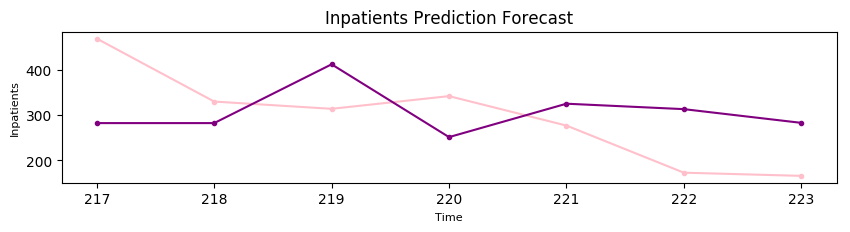

RMSE VALUE 113.75180343643346


In [50]:
# Rollling Forecast

# Number of days to Forecast Parameter
end =7
values = data.iloc[:-end,1]
actual_values = data.iloc[len(data)-end:,1]
pred_values=[]
indexes=data.iloc[len(data)-end:,1].index

for i in range(end):
  model = ARIMA((values),(2, 0, 1))
  arima_fit= model.fit()
  
  fnext = arima_fit.forecast()[0][0] 
  pred_values.append(fnext)
  values = data.iloc[:-end+i,1]

pred_values=pd.Series(pred_values)
pred_values.index=indexes

#Doubt
#pred_values=pred_values.shift(-1)[:]
plt.figure(num=None, figsize=(10, 2), dpi=100,facecolor='w', edgecolor='k')
plt.xlabel('Time', fontsize=8)
plt.ylabel('Inpatients', fontsize=8)
plt.plot(actual_values,marker='.', color='pink')
plt.plot(pred_values,marker='.', color='purple')
plt.title("Inpatients Prediction Forecast",fontsize=12)
plt.show()

# Needs correction ??
print("RMSE VALUE",math.sqrt(rms(actual_values,pred_values)))
#print(actual_values,pred_values)

# SARIMA

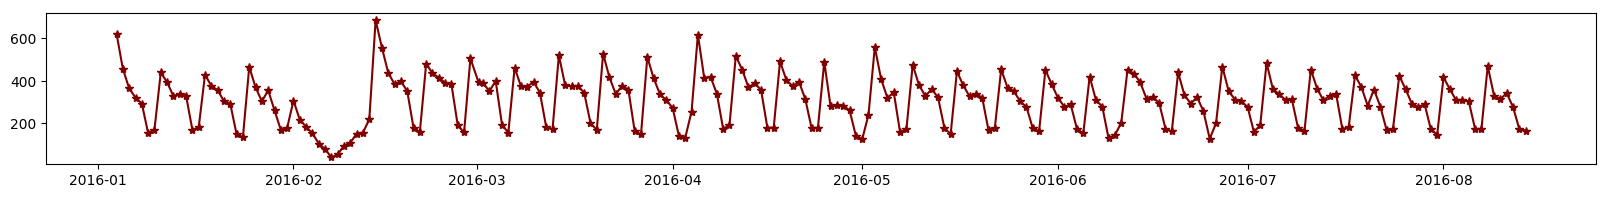

In [52]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt, SARIMAX
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import requests
import io
from sklearn.metrics import mean_squared_error as rms
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/thefr33radical/hybrid_forecasting/master/data/parsed_inpatients.csv", error_bad_lines=False,header=0, parse_dates=[1], index_col=0, squeeze=True)
data["num"] = data["num"].astype(float)

plt.figure(num=None, figsize=(20, 2), dpi=100,facecolor='w', edgecolor='k')
plt.plot(data["date"],data["num"],marker='*', color='maroon')
plt.show()

In [53]:
model=SARIMAX(endog=data["num"],order=(2,0,1),seasonal_order=(0,1,1,7),enforce_invertibility=False)
sarima_fit= model.fit()
print(sarima_fit.summary())

                                 Statespace Model Results                                
Dep. Variable:                               num   No. Observations:                  224
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 7)   Log Likelihood               -1237.648
Date:                           Tue, 30 Jul 2019   AIC                           2485.296
Time:                                   07:37:29   BIC                           2502.196
Sample:                                        0   HQIC                          2492.123
                                           - 224                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0128      0.573      1.768      0.077      -0.110       2.135
ar.L2         -0.1987      0.330     -0.603

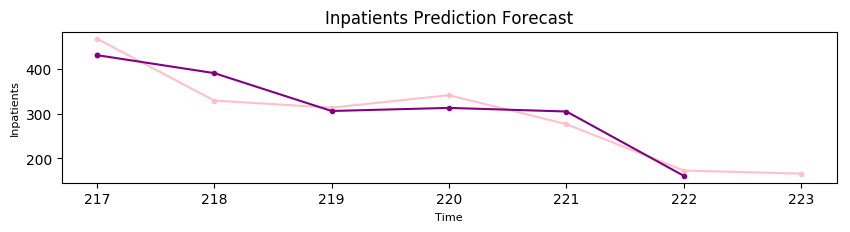

RMSE VALUE 73.6114415114076


In [54]:
# Rollling Forecast

# Number of days to Forecast Parameter
end =7
values = data.iloc[:-end,1]
actual_values = data.iloc[len(data)-end:,1]
pred_values=[]
indexes=[]

for i in range(end):
  model=SARIMAX(endog=values,order=(2,0,1),seasonal_order=(0,1,1,7),enforce_invertibility=False)
  sarima_fit= model.fit()
  fnext = sarima_fit.forecast(1)  
  indexes.append(fnext.index.values[0])
  pred_values.append(fnext.values[0])
  values = data.iloc[:-end+i,1]

pred_values=pd.Series(pred_values)
pred_values.index=indexes

#Doubt
#pred_values=pred_values.shift(-1)[:]
plt.figure(num=None, figsize=(10, 2), dpi=100,facecolor='w', edgecolor='k')
plt.xlabel('Time', fontsize=8)
plt.ylabel('Inpatients', fontsize=8)
plt.plot(actual_values,marker='.', color='pink')
plt.plot(pred_values,marker='.', color='purple')
plt.title("Inpatients Prediction Forecast",fontsize=12)
plt.show()

# Needs correction ??
print("RMSE VALUE",math.sqrt(rms(actual_values,pred_values)))

###SARIMA Links
* https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARMAResults.forecast.html
* https://medium.com/@rrfd/sarima-modelling-for-car-sharing-basic-data-pipelines-applications-with-python-pt-1-75de4677c0cd
* http://barnesanalytics.com/sarima-models-using-statsmodels-in-python
* https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788
* https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
